In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
texas = pd.read_csv("Texas_all_data.csv")


In [3]:
texas.columns.unique()

Index(['Unnamed: 0', 'Unnamed: 0_x', 'SCAPN', 'SCSitus_NumNam_x', 'PropID',
       'Star_rating', 'City', 'State', 'Zip', 'County', 'For_sale_price',
       'For_sale_status', 'Land_area', 'Num_units', 'Cap_rate', 'Vacancy_%',
       'Avg_unit_sqft', 'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt',
       'Amenities', 'Year_built', 'Year_reno', 'Last_sale_date',
       'Last_sale_price', 'Transit_dist_mile', 'Transit_walk_time_min',
       'Const_material', 'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019_A

In [4]:
## Convert columns to proper format
texas.Last_sale_date = pd.to_datetime(texas.Last_sale_date)
texas.Sale_date = pd.to_datetime(texas.Sale_date)
texas['Vacancy_%'] = texas['Vacancy_%']/100
texas.Cap_rate = texas.Cap_rate / 100
texas["Avg_Concession_%"] =texas["Avg_Concession_%"]/100
texas["Cap_rate_pro_forma"] = texas["Cap_rate_pro_forma"]/100
texas["Cap_rate_actual"] = texas["Cap_rate_actual"]/100
texas["Last_sale_price"] = texas["Last_sale_price"].str.replace(",", "")


texas["Studio_concession_%"] = texas["Studio_concession_%"]/100
texas["Studio_vacancy_%"] = texas["Studio_vacancy_%"]/100
texas["1_bed_concession_%"] = texas["1_bed_concession_%"]/100
texas["1_bed_vacancy_%"] = texas["1_bed_vacancy_%"]/100
texas["2_bed_concession_%"] = texas["2_bed_concession_%"]/100
texas["2_bed_vacancy_%"] = texas["2_bed_vacancy_%"]/100
texas["3_bed_concession_%"] = texas["3_bed_concession_%"]/100
texas["3_bed_vacancy_%"] = texas["3_bed_vacancy_%"]/100
texas["4_bed_concession_%"] = texas["4_bed_concession_%"]/100
texas["4_bed_vacancy_%"] = texas["4_bed_vacancy_%"]/100

## To Calculate NOI, we need Sales Price, Cap rate, Land value, Concession, Vacancy%

In [5]:
## Create a final Price column
texas["Price"] = texas.Sale_price

In [6]:
### Fill in the null value with approximates
texas["Price"].fillna(texas["Last_sale_price"], inplace = True)
texas.Price.fillna((texas["Total_value"]), inplace = True)

In [7]:
## Remove entries with null sales price
texas = texas.dropna(subset = ["Price"]).reset_index()
texas = texas.drop(texas.columns[0], axis = 1)

In [8]:
texas.shape

(5751, 74)

In [9]:
### In the case of no approximates, use average cap rate for city

avg_cap_rate = texas.groupby("State")["Cap_rate"].mean()

In [10]:
avg_cap_rate

State
TX   NaN
Name: Cap_rate, dtype: float64

In [11]:
## Create general cap rate column and fill in the null value with approximates

texas.Cap_rate.fillna(texas["Cap_rate_actual"], inplace = True)
texas.Cap_rate.fillna(texas["Cap_rate_pro_forma"], inplace = True)


In [12]:
avg_cap_rate = texas.groupby("State")["Cap_rate"].mean()

In [13]:
avg_cap_rate

State
TX    0.070101
Name: Cap_rate, dtype: float64

In [14]:
texas.Cap_rate.fillna(avg_cap_rate[0], inplace = True)

In [15]:
## Remove entry with null cap rate
texas = texas.dropna(subset = ["Cap_rate"])

In [16]:
texas.loc[texas["Vacancy_%"] > 0.8].index

Int64Index([84, 989, 3440, 4119], dtype='int64')

In [17]:
texas = texas.drop(texas.index[[84,989,3440,4119]]).reset_index()

In [18]:
texas.shape

(5747, 75)

In [19]:
## Generate general Land value 
avg_land_value = texas.groupby("County")["Land_value"].mean()
avg_land_value[avg_land_value.isna()]

County
Bastrop      NaN
Bee          NaN
Cherokee     NaN
Hutchinson   NaN
Washington   NaN
Wharton      NaN
Name: Land_value, dtype: float64

In [20]:
county = texas.County.unique()
county

array(['Bexar', 'Travis', 'Brown', 'Lubbock', 'Jefferson', 'Kaufman',
       'Nueces', 'Hidalgo', 'Tarrant', 'Dallas', 'Tom Green', 'Harris',
       'Williamson', 'Smith', 'Fort Bend', 'Collin', 'Bell', 'Johnson',
       'Hays', 'Midland', 'El Paso', 'Cameron', 'Montgomery', 'Brazoria',
       'Hunt', 'Cherokee', 'Lamar', 'Franklin', 'Denton', 'Angelina',
       'Ector', 'Taylor', 'Victoria', 'Gregg', 'Galveston', 'Comal',
       'Randall', 'Hardin', 'Medina', 'Ellis', 'Liberty', 'Hutchinson',
       'Chambers', 'Palo Pinto', 'Mclennan', 'Val Verde', 'Parker',
       'Wharton', 'Washington', 'Brazos', 'San Patricio', 'Henderson',
       'Walker', 'Orange', 'Kendall', 'Matagorda', 'Wichita',
       'Nacogdoches', 'Rockwall', 'Polk', 'Kleberg', 'Guadalupe', 'Hood',
       'Gillespie', 'Potter', 'Hill', 'Hopkins', 'Wise', 'Bee', 'Hale',
       'Grayson', 'Webb', 'Bowie', 'Aransas', 'Erath', 'Bastrop',
       'Navarro'], dtype=object)

In [21]:
for i in county:
    texas.loc[texas['Land_value'].isnull() & (texas.County == i), 'Land_value'] = avg_land_value[i]
    texas.loc[(texas['Land_value'] == 0) & (texas.County == i), 'Land_value'] = avg_land_value[i]

texas.loc[texas['Land_value'].isnull() & (texas.County == "Bastrop"), 'Land_value'] = avg_land_value.mean()
texas.loc[texas['Land_value'].isnull() & (texas.County == "Bee"), 'Land_value'] = avg_land_value.mean()
texas.loc[texas['Land_value'].isnull() & (texas.County == "Cherokee"), 'Land_value'] = avg_land_value.mean()
texas.loc[texas['Land_value'].isnull() & (texas.County == "Hutchinson"), 'Land_value'] = avg_land_value.mean()
texas.loc[texas['Land_value'].isnull() & (texas.County == "Washington"), 'Land_value'] = avg_land_value.mean()
texas.loc[texas['Land_value'].isnull() & (texas.County == "Wharton"), 'Land_value'] = avg_land_value.mean()

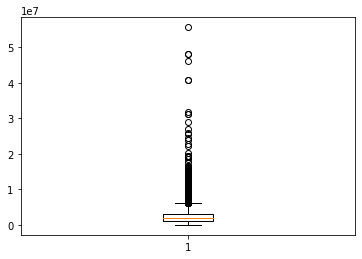

In [22]:
plt.figure()

plt.boxplot(texas["Land_value"])

plt.show()

In [23]:
## Concession % - Assuming it's a percentage of sales price

a = []

for i in range(len(texas)):
    a.append(float(texas.Price[i])*texas["Avg_Concession_%"][i])

In [24]:
texas["Concession_value"] = a

In [25]:
## Create Column for NOI

b = []

for i in range(len(texas)):
    b.append((float(texas.Price[i]) - texas["Land_value"][i] + texas["Concession_value"][i])\
             *texas["Cap_rate"][i]/(1-texas["Vacancy_%"][i]))

In [26]:
texas["NOI"] = b

In [27]:
texas.head()

,index,Unnamed: 0,Unnamed: 0_x,SCAPN,SCSitus_NumNam_x,PropID,Star_rating,City,State,Zip,...,Assessed_yr,Floor_area_ratio,Num_floors,Price_per_sqft,Land_price_per_AC,Sale_date,Sale_price,Price,Concession_value,NOI
0,0,1,1,TX Bexar 00273-002-0011,TX Bexar939 Frio St,P10570,4,San Antonio,TX,78207,...,2016.0,0.853417,5.0,175.0,6505576.21,1970-01-01 00:00:00.000042719,17500000.0,1.75e+07,105000.000,892926.393270
1,1,4,4,TX Travis 04120906540000,TX Travis5112 1st St,P10573,3,Austin,TX,787452293,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,10000000,60000.000,467114.698218
2,2,5,5,TX Brown 55022,TX Brown2801 4th St,P10574,3,Brownwood,TX,768016161,...,2014.0,0.306697,2.0,NaN,NaN,1970-01-01 00:00:00.000042048,NaN,1.64401e+06,6576.040,115386.377347
3,3,6,6,TX Lubbock R94203,TX Lubbock5525 4th St,P10575,2,Lubbock,TX,794164230,...,2015.0,0.339285,1.0,NaN,NaN,1970-01-01 00:00:00.000042250,NaN,2.24072e+06,15685.075,134619.352154
4,4,7,6,TX Lubbock R94203,TX Lubbock5525 4th St,P10575,2,Lubbock,TX,794164230,...,2011.0,0.339285,1.0,NaN,NaN,1970-01-01 00:00:00.000040997,NaN,2.10688e+06,14748.181,124489.406682


In [28]:
## Remove negative NOI that doesn't make sense
texas = texas.drop(texas[texas.NOI<0].index, axis = 0)

In [29]:
texas.to_csv("TX_NOI.csv")